In [8]:
# Importing libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import tree
import warnings

In [9]:
csv_file_path= r"D:\Crop Recommender\model\crop_recommendation.csv"
df = pd.read_csv(csv_file_path)

In [10]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [11]:
df.tail()

N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

In [12]:
df.size

17600

In [13]:
df.shape

(2200, 8)

In [14]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [15]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [16]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [17]:
df['label'].value_counts()

pigeonpeas     100
apple          100
mothbeans      100
lentil         100
papaya         100
coconut        100
blackgram      100
coffee         100
orange         100
grapes         100
muskmelon      100
banana         100
mungbean       100
mango          100
jute           100
kidneybeans    100
pomegranate    100
rice           100
watermelon     100
cotton         100
maize          100
chickpea       100
Name: label, dtype: int64

In [18]:
df.duplicated().sum()

0

<AxesSubplot:>

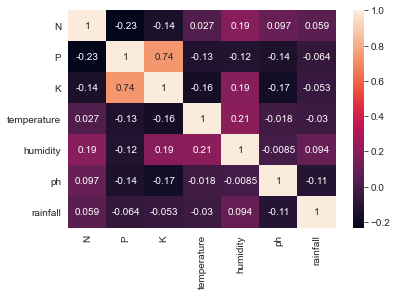

In [19]:
numeric_crop = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_crop.corr(),annot=True)

In [20]:
#Separating features and target labels
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [21]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [22]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [23]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


ModuleNotFoundError: No module named 'xgboost'

In [24]:
# Evaluate Logistic Regression
logistic_regression = LogisticRegression(solver='liblinear',max_iter=1000)
logistic_regression.fit(Xtrain, Ytrain)
Y_pred_lr = logistic_regression.predict(Xtest)
lr_accuracy = metrics.accuracy_score(Ytest, Y_pred_lr)

print("Logistic Regression accuracy:", metrics.accuracy_score(Ytest, Y_pred_lr))
print("Logistic Regression classification report:")
print(classification_report(Ytest, Y_pred_lr))

Logistic Regression accuracy: 0.9431818181818182
Logistic Regression classification report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.79      0.94      0.86        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.87      1.00      0.93        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      0.79      0.83        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      0.96      0.92        23
       maize       1.00      0.86      0.92        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       1.00      0.92      0.96        24
   muskmelon       1.00      1.00      1.00

In [25]:
# Evaluate Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(Xtrain, Ytrain)
Y_pred_nb = naive_bayes.predict(Xtest)
nb_accuracy = metrics.accuracy_score(Ytest, Y_pred_nb)

print("Naive Bayes accuracy:", metrics.accuracy_score(Ytest, Y_pred_nb))
print("Naive Bayes classification report:")
print(classification_report(Ytest, Y_pred_nb))


Naive Bayes accuracy: 0.990909090909091
Naive Bayes classification report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      

In [26]:
# Evaluate Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(Xtrain, Ytrain)
Y_pred_forest = random_forest.predict(Xtest)
rf_accuracy = metrics.accuracy_score(Ytest, Y_pred_forest)

print("Random Forest accuracy:", metrics.accuracy_score(Ytest, Y_pred_forest))
print("Random Forest classification report:")
print(classification_report(Ytest, Y_pred_forest))


Random Forest accuracy: 0.9931818181818182
Random Forest classification report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
 

In [27]:
# Evaluate Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(Xtrain, Ytrain)
Y_pred_tree = decision_tree.predict(Xtest)
dt_accuracy = metrics.accuracy_score(Ytest, Y_pred_tree)

print("Decision Tree accuracy:", metrics.accuracy_score(Ytest, Y_pred_tree))
print("Decision Tree classification report:")
print(classification_report(Ytest, Y_pred_tree))

Decision Tree accuracy: 0.9772727272727273
Decision Tree classification report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.93      0.88      0.90        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      0.93      0.91        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.91      0.91      0.91        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.90      0.95      0.92        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
 

In [28]:
# Evaluate SVM
svm = SVC()
svm.fit(Xtrain, Ytrain)
Y_pred_svm = svm.predict(Xtest)
svm_accuracy = metrics.accuracy_score(Ytest, Y_pred_svm)

print("SVM accuracy:", metrics.accuracy_score(Ytest, Y_pred_svm))
print("SVM classification report:")
print(classification_report(Ytest, Y_pred_svm))

SVM accuracy: 0.9772727272727273
SVM classification report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.85      1.00      0.92        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.92      1.00      0.96        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.

In [29]:
from sklearn.preprocessing import LabelEncoder

xgb = XGBClassifier()

# Encoding the target labels
label_encoder = LabelEncoder()
Ytrain_encoded = label_encoder.fit_transform(Ytrain)
Ytest_encoded = label_encoder.transform(Ytest)

# Using the encoded target labels to fit the XGBoost classifier
xgb.fit(Xtrain, Ytrain_encoded)
Y_pred_xgb = xgb.predict(Xtest)

# Convert the predicted labels back to their original form for evaluation
Y_pred_xgb_original = label_encoder.inverse_transform(Y_pred_xgb)

# Evaluate the XGBoost classifier
print("XGBoost accuracy:", accuracy_score(Ytest, Y_pred_xgb_original))
print("XGBoost classification report:")
print(classification_report(Ytest, Y_pred_xgb_original))
xgb_accuracy = metrics.accuracy_score(Ytest, Y_pred_xgb_original)

# Perform cross-validation for the XGBoost classifier
xgb_cv_scores = cross_val_score(xgb, Xtrain, Ytrain_encoded, cv=5)
print("Cross-validation scores for XGBoost:", xgb_cv_scores)


NameError: name 'XGBClassifier' is not defined

In [30]:

models = {
    'Logistic Regression': LogisticRegression(solver='liblinear',max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVM': SVC()
}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, features, target, cv=5)
    print(f"Cross-validation scores for {model_name}:", cv_scores)
    mean_cv_score = np.mean(cv_scores)
    print(f"Mean Cross-validation score for {model_name}:", mean_cv_score)
    print("")

print("Cross-validation scores for XGBoost:", xgb_cv_scores)
mean_xgb_cv_score = np.mean(xgb_cv_scores)
print("Mean Cross-validation score for XGBoost:", mean_xgb_cv_score)


Cross-validation scores for Logistic Regression: [0.96818182 0.93636364 0.95681818 0.95681818 0.94772727]
Mean Cross-validation score for Logistic Regression: 0.9531818181818181

Cross-validation scores for Naive Bayes: [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]
Mean Cross-validation score for Naive Bayes: 0.9950000000000001
Cross-validation scores for Random Forest: [0.99772727 0.99318182 0.99545455 0.99545455 0.98636364]
Mean Cross-validation score for Random Forest: 0.9936363636363638

Cross-validation scores for DecisionTreeClassifier: [0.99090909 0.98409091 0.98863636 0.98636364 0.98181818]
Mean Cross-validation score for DecisionTreeClassifier: 0.9863636363636363
Cross-validation scores for SVM: [0.98409091 0.97954545 0.97954545 0.97272727 0.975     ]
Mean Cross-validation score for SVM: 0.9781818181818182


NameError: name 'xgb_cv_scores' is not defined

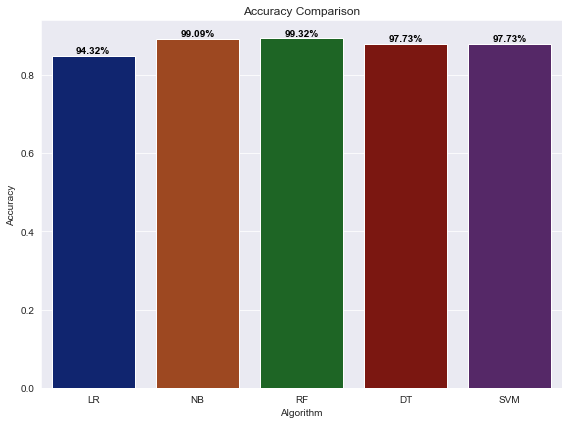

In [32]:
classifiers = ['LR', 'NB', 'RF', 'DT', 'SVM']
accuracies = [lr_accuracy, nb_accuracy, rf_accuracy, dt_accuracy, svm_accuracy]

# Create vertical bar plot
plt.figure(figsize=(8, 6))
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
bar_height = [0.9 * v for v in accuracies]

bar_plot = sns.barplot(x=classifiers, y=bar_height, palette='dark')

# Display accuracy values on the bars
for i, v in enumerate(accuracies):
    bar_plot.text(i, 0.9 * v, f'{v:.2%}', color='black', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [33]:
for name, accuracy in zip(classifiers, accuracies):
    print(f"{name} ---> {accuracy}")


LR ---> 0.9431818181818182
NB ---> 0.990909090909091
RF ---> 0.9931818181818182
DT ---> 0.9772727272727273
SVM ---> 0.9772727272727273


In [38]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../NaiveBayes.pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(naive_bayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [35]:
#Making Prediction

data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = naive_bayes.predict(data)
print(prediction)

['coffee']


In [36]:
data = np.array([[63,35,16, 22.02721, 65.35, 6.2, 83.73]])
prediction = naive_bayes.predict(data)
print(prediction)

['maize']


In [37]:
data = np.array([[85,58,41,21.77046169,80.31964408,7.038096361,226.6555374]])
prediction = naive_bayes.predict(data)
print(prediction)

['rice']
